# Predictive Modelling - Regression (Numerical Prediction)

In this notebook we use supervised machine learning algorithms to solve a  regression type prediction problem, predicting the quantity of CO2 Emissions (CO2EMISSIONS) using four variables that describe a vehicle's consumption behaviour (ENGINESIZE, CYLINDERS, FUELCONSUMPTION_COMB, FUELCONSUMPTION_COMB_MPG)  

## Importing libraries



Libraries are a collection of shared files (or modules) that contain functions for use by multiples programs. These allow for common functionality to be written once and repurposed as required. 

The Python [standard library](https://docs.python.org/3/library/) contains an extensive suite of modules that are built into Python by default. For additional functionality libraries are available from [PyPI](https://pypi.org/) (the Python Package Index).

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The following two commands ignore some warnings which are generally thrown due to version updates.
import warnings
warnings.filterwarnings("ignore")

# Ex: import numpy library (as a given short name) / Here we import the entire library (called alias)
import numpy as np # Used for scientific computing and efficient multi dimensional array processing
import pandas as pd # Used for data analysis and manipulation - data frames

# this is how to upgrade a library to its latest version, here we upgrade for MAPE in 0.24 
!pip install scikit-learn --upgrade

# Modelling utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# For Modelling
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import neighbors
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

# Explainability and visualisation libraries
from xgboost import plot_tree
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
# install shap explainability
!pip install shap
import shap

It is possible that some of the libraries that you are looking import are not available in Google Colaboratory by default. In order to provision the library in the environment you can install the library using the following command.

* Installing python libraries : ```!pip install {library_name}```
* Installing system packages : ```!apt-get install {package_name}```

[reference](https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb)

## Load the dataset

In [ ]:
#Load the CSV file containing the dataset.
fuel_dataset = pd.read_csv("fuel.csv")
#Preview the first 5 lines of the loaded data
fuel_dataset.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data exploration

In [ ]:
#view data types
fuel_dataset.info()
#view basic stats
fuel_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MAKE                      1067 non-null   object 
 1   MODEL                     1067 non-null   object 
 2   VEHICLECLASS              1067 non-null   object 
 3   ENGINESIZE                1067 non-null   float64
 4   CYLINDERS                 1067 non-null   int64  
 5   TRANSMISSION              1067 non-null   object 
 6   FUELTYPE                  1067 non-null   object 
 7   FUELCONSUMPTION_CITY      1067 non-null   float64
 8   FUELCONSUMPTION_HWY       1067 non-null   float64
 9   FUELCONSUMPTION_COMB      1067 non-null   float64
 10  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 11  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 100.2+ KB


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Data visualisation

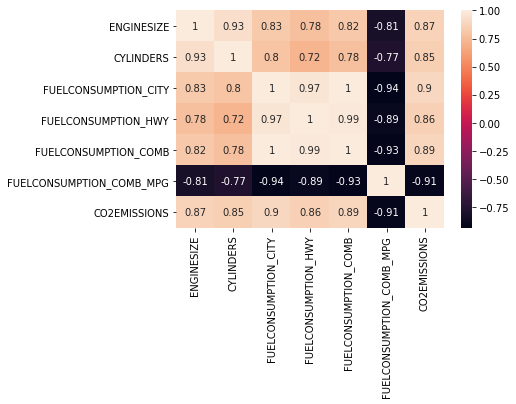

In [ ]:
#Use a dataframe function to calculate pairwise correlation 
corr_matrix = fuel_dataset.corr()
# corr_matrix #- show this also

#and then use seaborn heatmap for viz
sns.heatmap(corr_matrix, annot=True)

In [ ]:
#Sort correlations by the output variable "Resigned" 
corr_matrix['CO2EMISSIONS'].sort_values(ascending=True)

FUELCONSUMPTION_COMB_MPG   -0.906394
CYLINDERS                   0.849685
FUELCONSUMPTION_HWY         0.861748
ENGINESIZE                  0.874154
FUELCONSUMPTION_COMB        0.892129
FUELCONSUMPTION_CITY        0.898039
CO2EMISSIONS                1.000000
Name: CO2EMISSIONS, dtype: float64

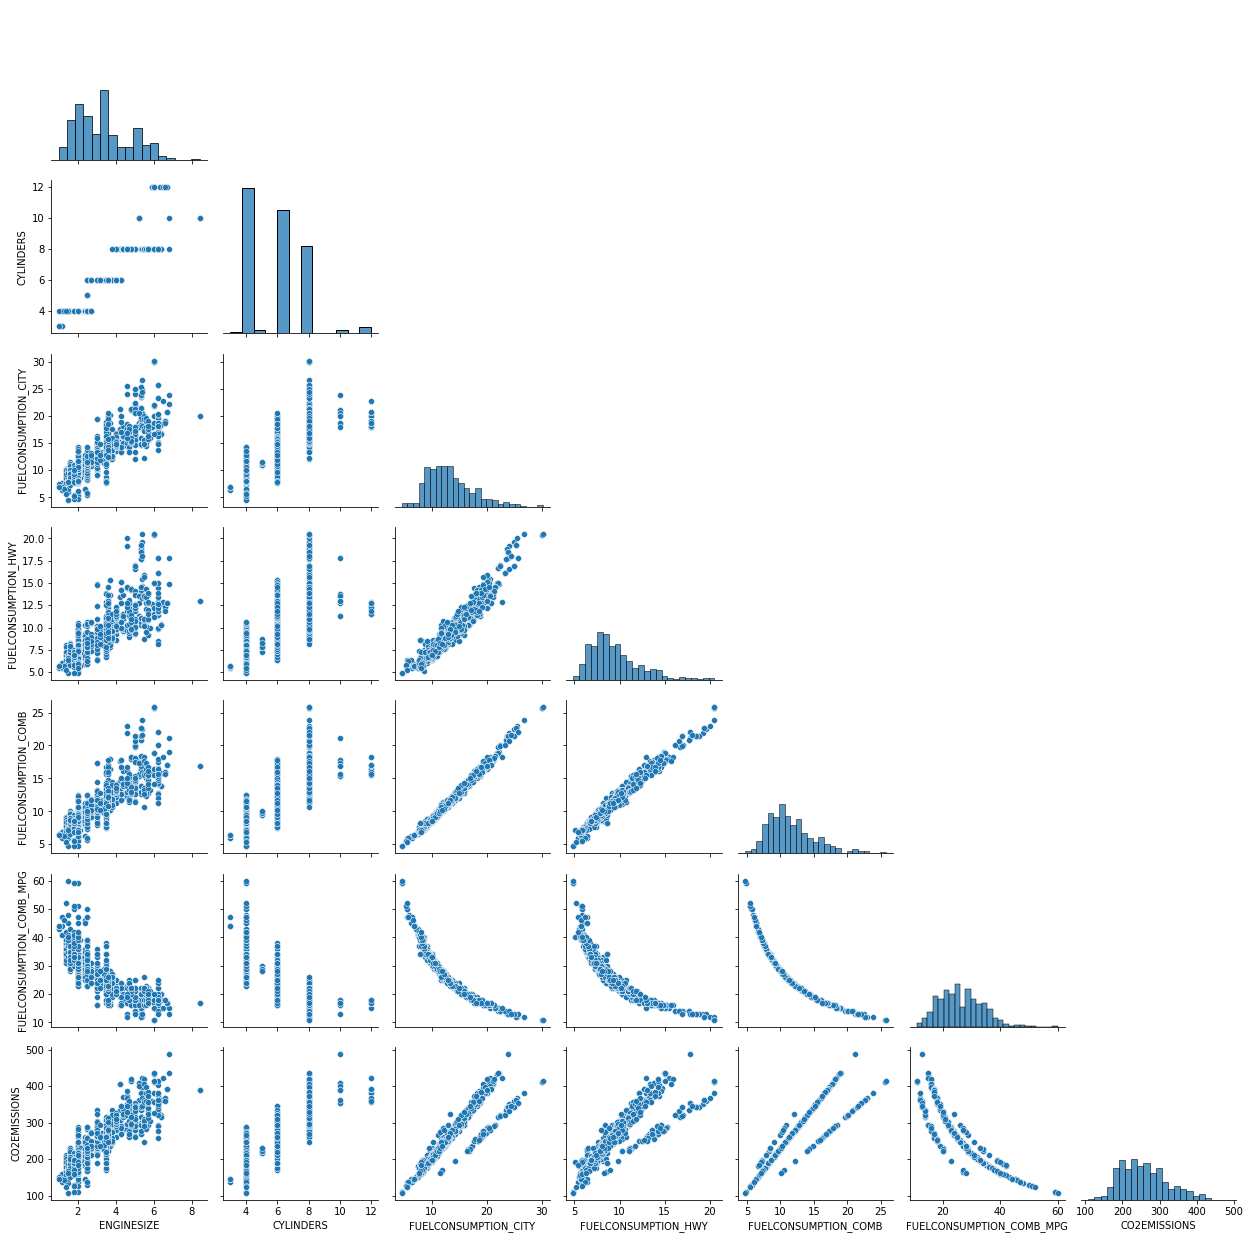

In [ ]:
sns.pairplot(data=fuel_dataset, corner=True)

## Preprocess and split the dataset

In [ ]:
fuel_dataset = fuel_dataset[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]

# Here we use a different function (from the numpy library) to randomly split the dataset into test/training/validation 
train, test, validate = np.split(fuel_dataset.sample(frac=1), [int(.6*len(fuel_dataset)), int(.8*len(fuel_dataset))])
print (train.shape, test.shape, validate.shape)
# (8999, 20) (3000, 20) (3000, 20)

(640, 5) (213, 5) (214, 5)


In [ ]:
#Prepare the columns in each split 
X_train = train.drop(columns=['CO2EMISSIONS'])
y_train = train[['CO2EMISSIONS']]

X_test = test.drop(columns=['CO2EMISSIONS'])
y_test = test[['CO2EMISSIONS']]

X_validate = validate.drop(columns=['CO2EMISSIONS'])
y_validate = validate[['CO2EMISSIONS']]

X_train.head()
y_train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
335,1.4,4,7.2,39
223,4.8,8,18.0,16
354,3.5,6,11.5,25
880,3.8,6,10.9,26
227,6.0,8,18.9,15


,CO2EMISSIONS
335,166
223,414
354,264
880,251
227,435


## Building the models

In [ ]:
#Multiple linear regression 
fuelLinReg = LinearRegression()
fuelLinReg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Decision tree 
fuelDecisionTree = tree.DecisionTreeRegressor() # notice here we use the Regressor while for classification we used DecisionTreeClassifier
fuelDecisionTree.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
# XGBoost 
fuelXGB = xgb.XGBRegressor() # notice here we use the Regressor while for classification we used XGBClassifier
fuelXGB.fit(X_train,y_train)

[21:32:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# Neural network - Multi-layer Perceptron
fuelMLP = MLPRegressor() # notice here we use the Regressor while for classification we used MLPClassifier
fuelMLP.fit(X_train,y_train)

MLPRegressor()

In [ ]:
# K-nearest neighbour is a classification algorithm, which we cannot use for regression problems. 
# here we use it ONLY to demonstrate - that we must know which model we are using, as it will produce some outcome (silent errors)
fuelKNN = neighbors.KNeighborsClassifier()
fuelKNN.fit(X_train,y_train)

KNeighborsClassifier()

## Model evaluation

In [ ]:
regressors = [ fuelMLP, fuelXGB, fuelKNN, fuelDecisionTree, fuelLinReg]
evalTable = PrettyTable(['Name', 'R-squared', 'MAE', 'RMSE', 'MAPE', 'MedAE' ], sortby='RMSE')
for i in regressors:
  # predict emissions
  y_predict = i.predict(X_test)
  evalTable.add_row( [ type(i).__name__, 
                      (round(i.score(X_test, y_test),3)), 
                      round(metrics.mean_absolute_error(y_test, y_predict),3),
                      round(metrics.mean_squared_error(y_test, y_predict, squared=False),3),
                      round(metrics.mean_absolute_percentage_error(y_test, y_predict),3),
                      round(metrics.median_absolute_error(y_test, y_predict),3),
                    ] )
print(evalTable)
# compare with mean=256 stdev=63 min=108 max=488

+-----------------------+-----------+--------+--------+-------+--------+
|          Name         | R-squared |  MAE   |  RMSE  |  MAPE | MedAE  |
+-----------------------+-----------+--------+--------+-------+--------+
|      XGBRegressor     |   0.971   | 6.138  | 10.945 | 0.025 | 2.644  |
| DecisionTreeRegressor |   0.938   | 3.887  | 15.883 | 0.015 |  0.0   |
|  KNeighborsClassifier |   0.446   | 5.488  | 17.141 | 0.021 |  2.0   |
|    LinearRegression   |   0.902   | 13.335 | 20.053 | 0.051 | 7.875  |
|      MLPRegressor     |   0.852   | 18.115 | 24.586 | 0.078 | 12.528 |
+-----------------------+-----------+--------+--------+-------+--------+


Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

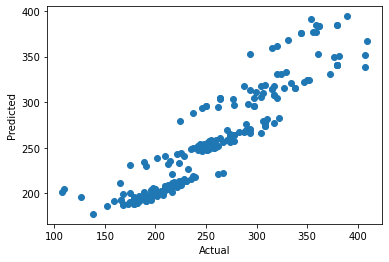

In [ ]:
# Visualise actual vs predicted on a scatter plot 
y_predict = fuelMLP.predict(X_test)
plt.scatter(y_test, y_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0.5, 0, 'actual')

Text(0, 0.5, 'predicted')

Text(0.5, 0, 'actual')

Text(0, 0.5, 'predicted')

Text(0.5, 0, 'actual')

Text(0, 0.5, 'predicted')

Text(0.5, 0, 'actual')

Text(0, 0.5, 'predicted')

Text(0.5, 0, 'actual')

Text(0, 0.5, 'predicted')

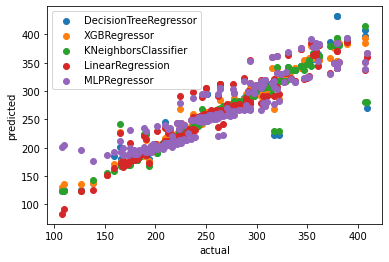

In [ ]:
#visualise all regressors
regressors = [fuelDecisionTree, fuelXGB, fuelKNN, fuelLinReg, fuelMLP]
for i in regressors:
  y_predict = i.predict(X_test)
  plt.scatter(y_test, y_predict, label=type(i).__name__, )
  plt.xlabel('actual')
  plt.ylabel('predicted')
  plt.legend(loc="upper left")
  #plt.show()  
plt.show()

## Making predictions

In [ ]:
#mean=256 stdev=63 min=108 max=488

fuel_NewData_1 = pd.DataFrame([[1.5,	4,	4.7,	60]], columns=X_train.columns)  # Prius - 1.5	4	4.7	60	108

fuel_NewData_2 = pd.DataFrame([[4, 8, 12.2,	23]], columns=X_train.columns) #audi s6 281

fuel_NewData_3 = pd.DataFrame([[6.8, 10, 21.2,	13]], columns=X_train.columns)  #ford e350 488


print( "Input: ", fuel_NewData_1, "\t\tPrediction: ", fuelXGB.predict(fuel_NewData_1)) 
print( "Input: ", fuel_NewData_2, "\t\tPrediction: ", fuelXGB.predict(fuel_NewData_2)) 
print( "Input: ", fuel_NewData_3, "\t\tPrediction: ", fuelXGB.predict(fuel_NewData_3)) 


Input:     ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG
0         1.5          4                   4.7                        60 		Prediction:  [130.57973]
Input:     ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG
0           4          8                  12.2                        23 		Prediction:  [285.0541]
Input:     ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG
0         6.8         10                  21.2                        13 		Prediction:  [476.75287]


## Model explainability 

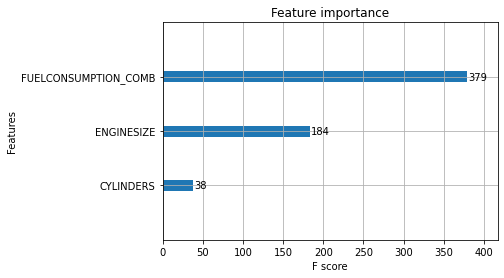

In [ ]:
# Built-in function in XGBoost library for feature importance
xgb.plot_importance(fuelXGB)

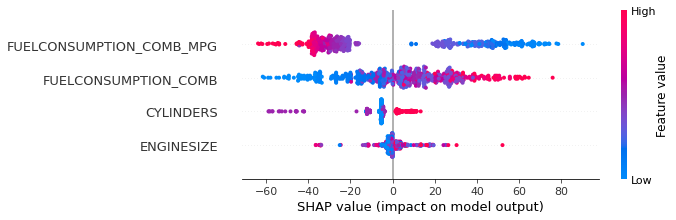

In [ ]:
# Using a SHAP explainer - works for tree-based models only
shapExplainer = shap.TreeExplainer(fuelDecisionTree) 
shapExplainer_values = shapExplainer.shap_values(X_train)
shap.summary_plot(shapExplainer_values, X_train)